In [61]:
library("twitteR")
library("tm")
library("stringr")
library("dplyr")
library("ggplot2")
library("SnowballC")
library("qdap")
library("wordcloud")

#### UsingTwitter API keys to import the tweets

In [217]:
consumer_key <- "*******"
consumer_secret <- "**********"
access_token <- "**********"
access_secret <- "*********"

In [218]:
setup_twitter_oauth(consumer_key,consumer_secret,access_token,access_secret)

[1] "Using direct authentication"


In [219]:
findfd= "data science"
number= 1000

In [220]:
tweet=searchTwitter(findfd,number,lang="en")

In [221]:
tweetT=lapply(tweet,function(t)t$getText())
head(tweetT,5)

[[1]]
[1] "@carcar200002 @amuse @ScottGottliebMD @thehill @CDCgov You can’t quantify compliance. Correlating an unmeasurable p… https://t.co/3do1w2jUWC"

[[2]]
[1] "@spakhm Lol, all economics is bullshit. The dismal science is having a hell of a time with reproducibility. There i… https://t.co/4VZfH2cLHF"

[[3]]
[1] "RT @HumphreyPT: We are literally either at the peak or days away from peaking so this all makes 0 sense if you follow the data. SD, ND, Iow…"

[[4]]
[1] "We are literally either at the peak or days away from peaking so this all makes 0 sense if you follow the data. SD,… https://t.co/0fZSD9tbsz"

[[5]]
[1] "RT @machinelearnflx: Should high schools teach data science instead of calculus? https://t.co/5Nr1h2hb6x  #DataScience"

In [222]:
tryTolower = function(x)
{
  y = NA
  # tryCatch error
  try_error = tryCatch(tolower(x), error = function(e) e)
  # if not an error
  if (!inherits(try_error, "error"))
    y = tolower(x)
  return(y)
}

In [223]:
clean=function(t){
 t=gsub('[[:punct:]]','',t)
 t=gsub('[[:cntrl:]]','',t) 
 t=gsub('\\d+','',t)
 t=gsub('[[:digit:]]','',t)
 t=gsub('@\\w+','',t)
 t=gsub('http\\w+','',t)
 t=gsub("^\\s+|\\s+$", "", t)
 t=sapply(t,function(x) tryTolower(x))
 t=str_split(t," ")
 t=unlist(t)
 return(t)
}

In [224]:
tweetclean=lapply(tweetT,function(x) clean(x))
head(tweetclean,5)

[[1]]
 [1] "carcar"          "amuse"           "scottgottliebmd" "thehill"        
 [5] "cdcgov"          "you"             "cant"            "quantify"       
 [9] "compliance"      "correlating"     "an"              "unmeasurable"   
[13] "p"              

[[2]]
 [1] "spakhm"          "lol"             "all"             "economics"      
 [5] "is"              "bullshit"        "the"             "dismal"         
 [9] "science"         "is"              "having"          "a"              
[13] "hell"            "of"              "a"               "time"           
[17] "with"            "reproducibility" "there"           "i"              

[[3]]
 [1] "rt"         "humphreypt" "we"         "are"        "literally" 
 [6] "either"     "at"         "the"        "peak"       "or"        
[11] "days"       "away"       "from"       "peaking"    "so"        
[16] "this"       "all"        "makes"      ""           "sense"     
[21] "if"         "you"        "follow"     "the"        "data"      
[26] "sd"         "nd"         "iow"       

[[4]]
 [1] "we"        "are"       "literally" "either"    "at"        "the"      
 [7] "peak"      "or"        "days"      "away"      "from"      "peaking"  
[13] "so"        "this"      "all"       "makes"     ""          "sense"    
[19] "if"        "you"       "follow"    "the"       "data"      "sd"       

[[5]]
 [1] "rt"              "machinelearnflx" "should"          "high"           
 [5] "schools"         "teach"           "data"            "science"        
 [9] "instead"         "of"              "calculus"        ""               
[13] ""                "datascience"

In [225]:
returnpscore=function(tweet) {
    pos.match=match(tweet,positive.words)
    pos.match=!is.na(pos.match)
    pos.score=sum(pos.match)
    return(pos.score)
}

In [226]:
positive.score=lapply(tweetclean,function(x) returnpscore(x))

In [227]:
pcount=0
for (i in 1:length(positive.score)) {
  pcount=pcount+positive.score[[i]]
}
pcount

[1] 537

In [228]:
poswords=function(tweets){
    pmatch=match(t,positive.words)
    posw=positive.words[pmatch]
    posw=posw[!is.na(posw)]
    return(posw)
  }

In [229]:
words=NULL
pdatamart=data.frame(words)

for (t in tweetclean) {
  pdatamart=c(poswords(t),pdatamart)
}
head(pdatamart,10)

[[1]]
[1] "safe"

[[2]]
[1] "affordable"

[[3]]
[1] "best"

[[4]]
[1] "affordable"

[[5]]
[1] "affordable"

[[6]]
[1] "top"

[[7]]
[1] "right"

[[8]]
[1] "right"

[[9]]
[1] "right"

[[10]]
[1] "best"

In [230]:
returnnscore=function(tweet) {
    nos.match=match(tweet,negative.words)
    nos.match=!is.na(nos.match)
    nos.score=sum(nos.match)
    return(nos.score)
}

In [231]:
negative.score=lapply(tweetclean,function(x) returnnscore(x))

In [232]:
ncount=0
for (i in 1:length(negative.score)) {
  ncount=ncount+negative.score[[i]]
}
ncount

[1] 204

In [233]:
noswords=function(tweets){
    nmatch=match(t,negative.words)
    nosw=negative.words[nmatch]
    nosw=nosw[!is.na(nosw)]
    return(nosw)
  }

In [234]:
words=NULL
ndatamart=data.frame(words)

for (t in tweetclean) {
  ndatamart=c(noswords(t),ndatamart)
}
head(ndatamart,10)

[[1]]
[1] "disruptive"

[[2]]
[1] "inability"

[[3]]
[1] "lack"

[[4]]
[1] "disruptive"

[[5]]
[1] "bitch"

[[6]]
[1] "fuzzy"

[[7]]
[1] "complex"

[[8]]
[1] "fuzzy"

[[9]]
[1] "complex"

[[10]]
[1] "sadly"

In [235]:
pwords=unlist(pdatamart)
nwords=unlist(ndatamart)

In [236]:
dpwords=data.frame(table(pwords))
dnwords=data.frame(table(nwords))

In [240]:
dpwords=dpwords%>%
  mutate(pwords=as.character(pwords))%>%
  filter(Freq>7)

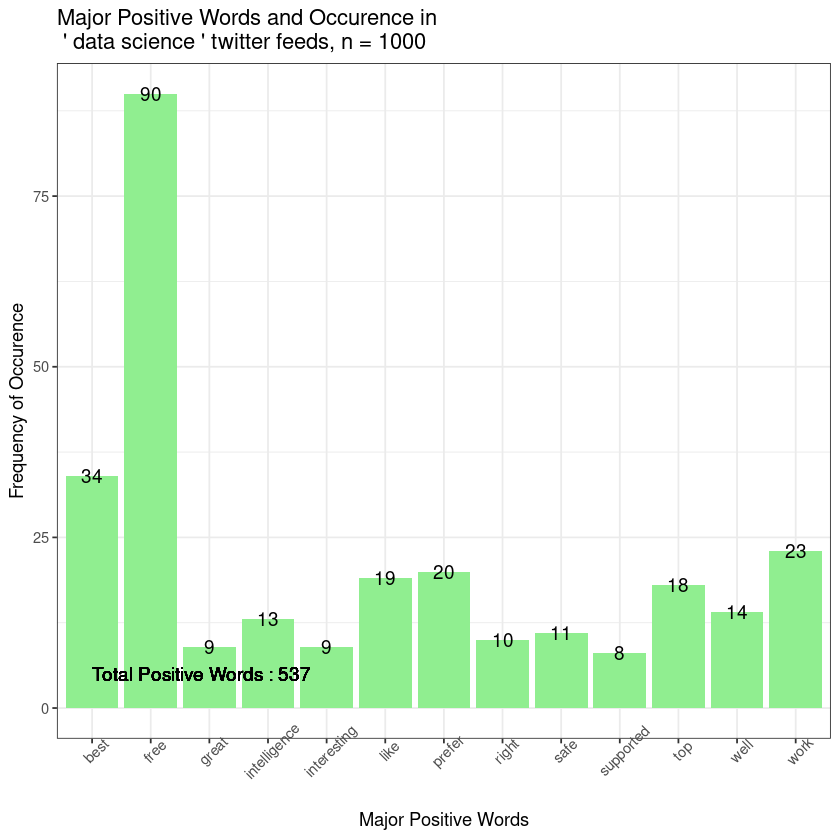

In [241]:
ggplot(dpwords,aes(pwords,Freq))+geom_bar(stat="identity",fill="lightgreen")+theme_bw()+
  geom_text(aes(pwords,Freq,label=Freq),size=4)+
  labs(x="Major Positive Words", y="Frequency of Occurence",title=paste("Major Positive Words and Occurence in \n '",findfd,"' twitter feeds, n =",number))+
  geom_text(aes(1,5,label=paste("Total Positive Words :",pcount)),size=4,hjust=0)+theme(axis.text.x=element_text(angle=45))

In [253]:
dnwords=dnwords%>%
  mutate(nwords=as.character(nwords))%>%
  filter(Freq>5)

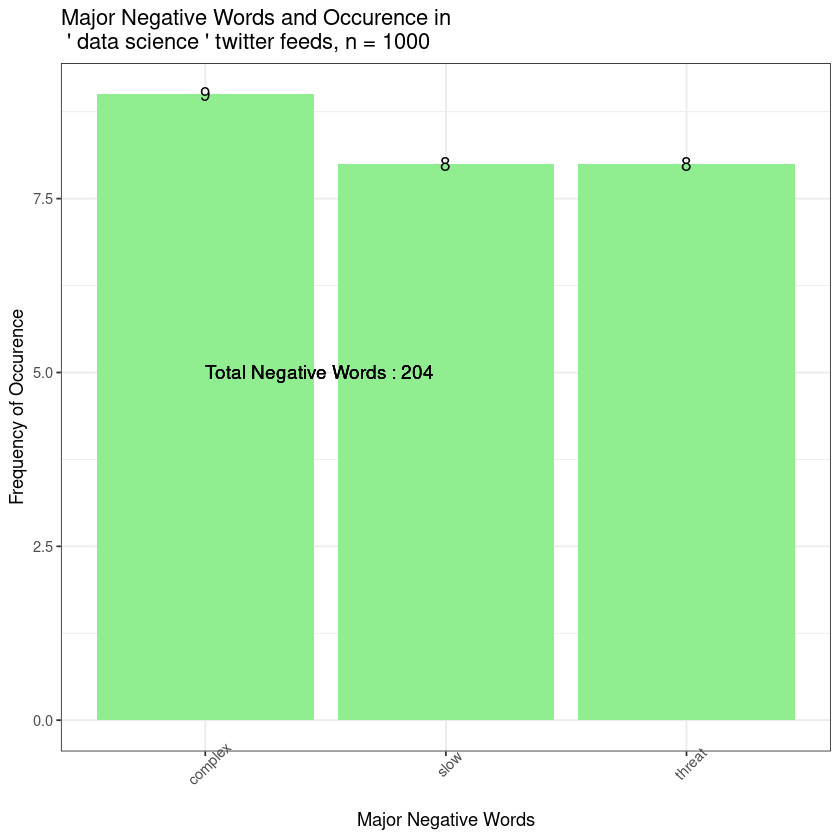

In [254]:
ggplot(dnwords,aes(nwords,Freq))+geom_bar(stat="identity",fill="lightgreen")+theme_bw()+
  geom_text(aes(nwords,Freq,label=Freq),size=4)+
  labs(x="Major Negative Words", y="Frequency of Occurence",title=paste("Major Negative Words and Occurence in \n '",findfd,"' twitter feeds, n =",number))+
  geom_text(aes(1,5,label=paste("Total Negative Words :",ncount)),size=4,hjust=0)+theme(axis.text.x=element_text(angle=45))

In [255]:
tweetscorpus=Corpus(VectorSource(tweetclean))
stopwords_new=c(stopwords("english"),"rt","amp")
tweetscorpus=tm_map(tweetscorpus,removeWords,stopwords_new)
tweetscorpus=tm_map(tweetscorpus,removePunctuation)

Warning message in tm_map.SimpleCorpus(tweetscorpus, removeWords, stopwords_new):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(tweetscorpus, removePunctuation):
“transformation drops documents”


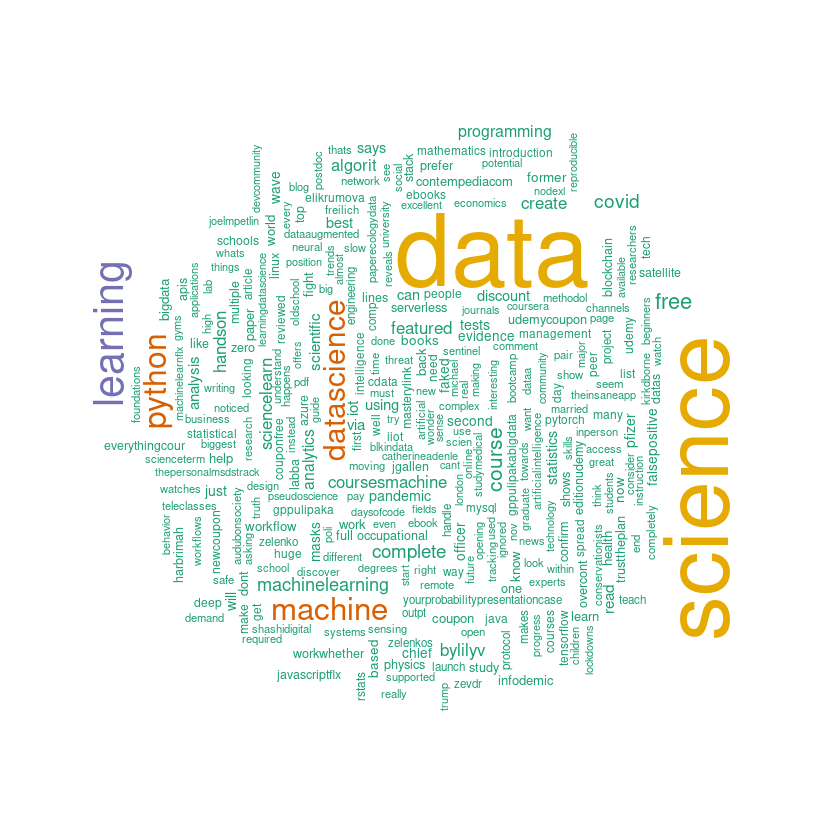

In [256]:
wordcloud(tweetscorpus,scale=c(5,0.5),random.order = TRUE,rot.per = 0.50,use.r.layout = FALSE,colors = brewer.pal(6,"Dark2"),max.words = 300)

In [214]:
dtm=DocumentTermMatrix(tweetscorpus)
# #removing sparse terms
dtms=removeSparseTerms(dtm,.99)
freq=sort(colSums(as.matrix(dtm)),decreasing=TRUE)
#get some more frequent terms
findFreqTerms(dtm,lowfreq=10)

[1] "dont"                            "data"                           
  [3] "science"                         "know"                           
  [5] "moving"                          "want"                           
  [7] "deep"                            "learning"                       
  [9] "machine"                         "bigdata"                        
 [11] "open"                            "well"                           
 [13] "completely"                      "get"                            
 [15] "just"                            "machinelearning"                
 [17] "datascience"                     "via"                            
 [19] "freilich"                        "launch"                         
 [21] "satellite"                       "end"                            
 [23] "look"                            "algorit"                        
 [25] "bylilyv"                         "coursesmachine"                 
 [27] "create"                          "featured"                       
 [29] "handson"                         "python"                         
 [31] "sciencelearn"                    "article"                        
 [33] "artificial"                      "intelligence"                   
 [35] "analytics"                       "artificialintelligence"         
 [37] "will"                            "makes"                          
 [39] "mathematics"                     "study"                          
 [41] "can"                             "engineering"                    
 [43] "schools"                         "teach"                          
 [45] "free"                            "statistics"                     
 [47] "analysis"                        "handle"                         
 [49] "yourprobabilitypresentationcase" "researchers"                    
 [51] "cdata"                           "based"                          
 [53] "safe"                            "azure"                          
 [55] "couponfree"                      "discount"                       
 [57] "udemy"                           "udemycoupon"                    
 [59] "statistical"                     "confirm"                        
 [61] "evidence"                        "health"                         
 [63] "jgallen"                         "labba"                          
 [65] "lines"                           "masks"                          
 [67] "multiple"                        "occupational"                   
 [69] "physics"                         "prefer"                         
 [71] "scientific"                      "workwhether"                    
 [73] "make"                            "course"                         
 [75] "thats"                           "consider"                       
 [77] "day"                             "people"                         
 [79] "chief"                           "covid"                          
 [81] "faked"                           "falsepositive"                  
 [83] "former"                          "officer"                        
 [85] "pandemic"                        "pfizer"                         
 [87] "says"                            "second"                         
 [89] "tests"                           "wave"                           
 [91] "audubonsociety"                  "conservationists"               
 [93] "discover"                        "happens"                        
 [95] "methodol"                        "oldschool"                      
 [97] "pair"                            "remote"                         
 [99] "sensing"                         "tracking"                       
[101] "ebooks"                          "gppulipaka"                     
[103] "huge"                            "iiot"                           
[105] "iot"                             "java"                           
[107] "list"                            "pytorch"                        
[109] 

In [215]:
wf=data.frame(word=names(freq),freq=freq)
wfh=wf%>%
  filter(freq>=15,!word==tolower(findfd))

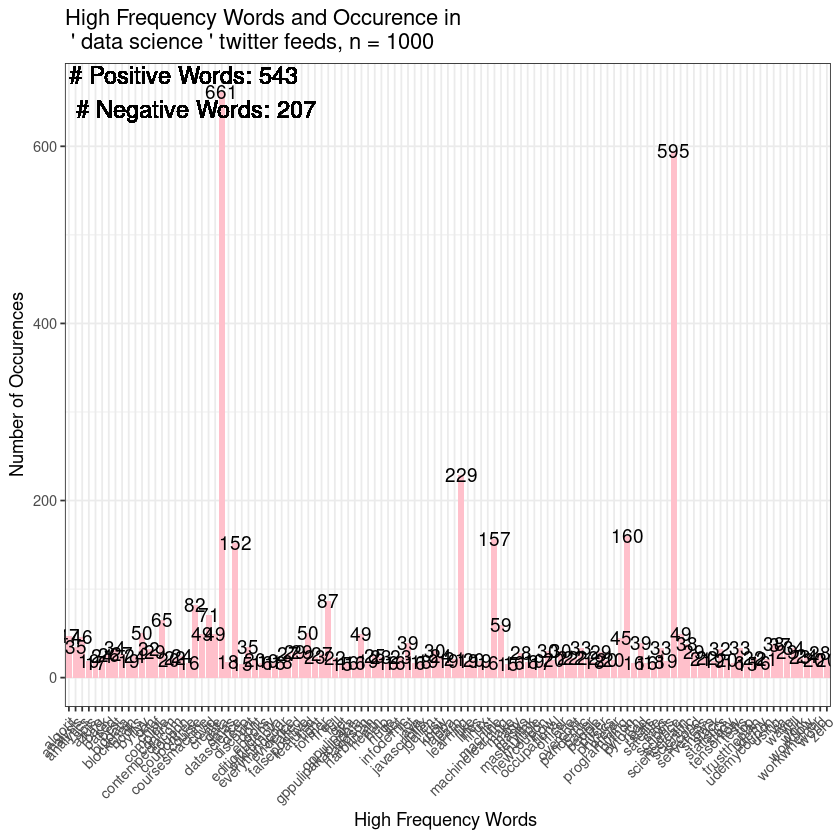

In [216]:
ggplot(wfh,aes(word,freq))+geom_bar(stat="identity",fill='pink')+theme_bw()+
  theme(axis.text.x=element_text(angle=45,hjust=1))+
  geom_text(aes(word,freq,label=freq),size=4)+labs(x="High Frequency Words ",y="Number of Occurences", title=paste("High Frequency Words and Occurence in \n '",findfd,"' twitter feeds, n =",number))+
  geom_text(aes(1,max(freq),label=paste("# Positive Words:",pcount,"\n","# Negative Words:",ncount)),size=5, hjust=0)